In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/35_0_2_20170116182734834.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/76_0_0_20170104213515132.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/36_1_0_20170116165722892.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/34_0_3_20170119200815948.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/18_1_0_20170104022856102.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/40_1_1_20170113011948248.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/45_0_0_20170117180013541.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/26_1_1_20170117153641469.jpg.c

In [2]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop

2024-06-28 15:55:38.757997: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 15:55:38.758106: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 15:55:38.862689: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
fldr="/kaggle/input/utkface-new/UTKFace"

In [4]:
import os
flies=os.listdir(fldr)

In [5]:
ages=[]
genders=[]
images=[]

In [6]:
ages=[]
genders=[]
images=[]

for fle in flies:
    if not fle.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue

    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr + '/' + fle  # Use string concatenation to form the path
    print(total)
    
    image = cv2.imread(total)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48, 48))
    images.append(image)


/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/35_0_2_20170116182734834.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/76_0_0_20170104213515132.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/36_1_0_20170116165722892.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/34_0_3_20170119200815948.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/18_1_0_20170104022856102.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/40_1_1_20170113011948248.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/45_0_0_20170117180013541.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/26_1_1_20170117153641469.jpg.c

# Create list of Ages and Gender from the dataset

In [7]:
for fle in flies:
     if not fle.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue
     age = int(fle.split('_')[0])
     gender = int(fle.split('_')[1])
     ages.append(age)
     genders.append(gender)

# Viewing a sample

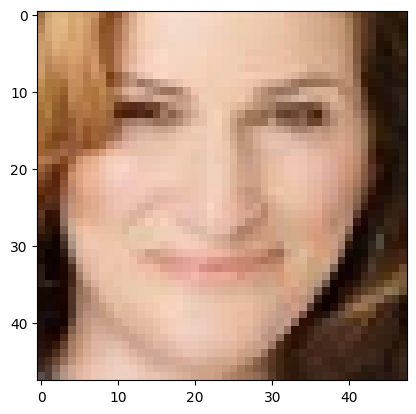

In [8]:
plt.imshow(images[87])

In [9]:
print(ages[87])

35


In [10]:
print(genders[87])

1


# saving images array,ages array, and genders arry in the system

In [11]:
import numpy as np
import os

In [12]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [13]:
import os
import numpy as np

# Change 'fldr' to a writable directory
fldr = '/kaggle/working/UTKFace'  # Update this path accordingly

# Ensure the directory exists
if not os.path.exists(fldr):
    os.makedirs(fldr)

# Save the arrays
np.save(os.path.join(fldr, 'image.npy'), images_f)
np.save(os.path.join(fldr, 'age.npy'), ages_f)
np.save(os.path.join(fldr, 'genders.npy'), genders_f)


In [14]:
# Save the numpy arrays to the specified folder
np.save(os.path.join(fldr, 'image.npy'), images_f)
np.save(os.path.join(fldr, 'age.npy'), ages_f)
np.save(os.path.join(fldr, 'genders.npy'), genders_f)

## Finding the number od elements in a daata set

In [15]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


## Finding the no.of Male and female samples Respectively

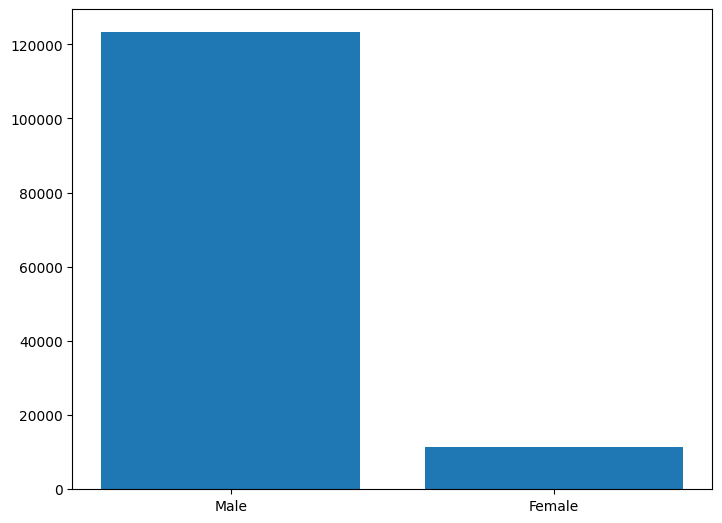

In [16]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[123291,11317]
ax.bar(gender,values)
plt.show()

Finding number  of samples of each age

In [17]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


Plotting the samples agewise

In [18]:
#converting Age count to list
val=values.tolist()
cnt=counts.tolist()

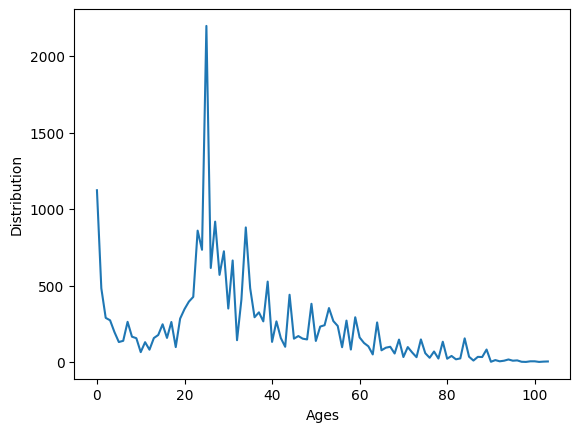

In [19]:
#Ploting samples age wise
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

## Defing lables for output

In [20]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1



# Creating anthoer list of images from Existing one
### for better learing

In [21]:
images_f_2=images_f/25

In [22]:
images_f_2.shape

(23708, 48, 48, 3)

In [23]:
labels_f=np.array(labels)

In [24]:
print(images_f_2.shape)
print(labels_f.shape)

(23708, 48, 48, 3)
(23708, 2)


In [25]:
labels_f=np.array(labels)


In [26]:
labels_f=np.array(labels)

# Adjust the datasets to match

In [27]:
min_length = min(len(images_f_2), len(labels_f))
images_f_2 = images_f_2[:min_length]
labels_f = labels_f[:min_length]

In [28]:
print(images_f_2.shape)
print(labels_f.shape)

(23708, 48, 48, 3)
(23708, 2)


## splitting the datasaet into test and train

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
 
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f, test_size=0.25)


In [31]:
Y_train[0:5]

array([[86,  0],
       [75,  0],
       [ 1,  0],
       [18,  1],
       [36,  0]])

## Splitting 'Y_test' and 'Y_train' further
## For better understanding 

In [32]:
Y_train_2=[Y_test[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [33]:
Y_train_2[0][0:5]

array([1, 1, 0, 1, 0])

In [34]:
Y_train_2[1][0:5]

array([86, 75,  1, 18, 36])

## Defining the model
 

 #  Create the model


In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, MaxPooling2D, Flatten, Dense, Dropout, Conv2D, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [36]:
def Convolution(input_tensor, filters):
    x = Conv2D(filters, kernel_size=(3, 3), padding='same', strides=(1, 1), kernel_regularizer=tf.keras.regularizers.l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [37]:

def create_model(input_shape):
    inputs = Input(shape=input_shape)
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    conv_3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
    conv_5 = Convolution(maxp_4, 512)
    maxp_5 = MaxPooling2D(pool_size=(2, 2))(conv_5)
    flatten = Flatten()(maxp_5)
    dense_1 = Dense(64, activation='swish')(flatten)
    dense_2 = Dense(64, activation='swish')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='swish', name='age_out')(drop_2)
    
    model = Model(inputs=inputs, outputs=[output_1, output_2])
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer='Adam', metrics=['accuracy'])
    return model


input_shape = (48, 48, 3)
model_instance = create_model(input_shape)
model_instance.summary()

 


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,634,370 (6.23 MB)

 Trainable params: 1,634,370 (6.23 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Create an instance of the model
input_shape = (48, 48, 3)
model_instance = create_model(input_shape)


In [39]:
if model_instance is None:
    raise ValueError("Model creation failed, returned None")
 
model_instance.compile(
    optimizer='adam',
    loss=['binary_crossentropy', 'mae'],  # Use the appropriate loss functions
    metrics=[['accuracy'], ['mae']]  # Use the appropriate metrics
)

In [40]:
# Define the callbacks
fle_s = 'Age_Sex_Detection.keras'
checkpoint = ModelCheckpoint(fle_s, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
Early_stop = EarlyStopping(patience=25, monitor='val_loss', restore_best_weights=True)
callback_list = [checkpoint, Early_stop]

In [41]:

# Example dummy data for illustration
X_train = np.random.random((17781, 48, 48, 3))
Y_train_sex = np.random.randint(0, 2, 17781)
Y_train_age = np.random.random(17781)
X_test = np.random.random((5927, 48, 48, 3))
Y_test_sex = np.random.randint(0, 2, 5927)
Y_test_age = np.random.random(5927)

# Prepare target data as lists of arrays
Y_train_2 = [Y_train_sex, Y_train_age]
Y_test_2 = [Y_test_sex, Y_test_age]

# Check shapes to ensure they match
print(f'X_train shape: {X_train.shape}')
print(f'Y_train_sex shape: {Y_train_sex.shape}')
print(f'Y_train_age shape: {Y_train_age.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_test_sex shape: {Y_test_sex.shape}')
print(f'Y_test_age shape: {Y_test_age.shape}')



X_train shape: (17781, 48, 48, 3)
Y_train_sex shape: (17781,)
Y_train_age shape: (17781,)
X_test shape: (5927, 48, 48, 3)
Y_test_sex shape: (5927,)
Y_test_age shape: (5927,)


## Running the Model
### this will tack some time

In [42]:
# Train the model
History = model_instance.fit(X_train, Y_train_2, 
                             batch_size=64, 
                             validation_data=(X_test, Y_test_2), 
                             epochs=10, 
                             callbacks=callback_list)

Epoch 1/10
  9/278 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - age_out_mae: 0.7264 - loss: 2.0266 - sex_out_accuracy: 0.5039

I0000 00:00:1719590272.587093      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - age_out_mae: 0.3091 - loss: 1.3019 - sex_out_accuracy: 0.4879
Epoch 1: val_loss improved from inf to 1.04800, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 36s 70ms/step - age_out_mae: 0.3090 - loss: 1.3014 - sex_out_accuracy: 0.4879 - val_age_out_mae: 0.2782 - val_loss: 1.0480 - val_sex_out_accuracy: 0.5021
Epoch 2/10


W0000 00:00:1719590291.763894      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - age_out_mae: 0.2553 - loss: 1.0096 - sex_out_accuracy: 0.5023
Epoch 2: val_loss improved from 1.04800 to 0.97633, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - age_out_mae: 0.2553 - loss: 1.0095 - sex_out_accuracy: 0.5023 - val_age_out_mae: 0.2527 - val_loss: 0.9763 - val_sex_out_accuracy: 0.5021
Epoch 3/10
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - age_out_mae: 0.2553 - loss: 0.9744 - sex_out_accuracy: 0.4992
Epoch 3: val_loss improved from 0.97633 to 0.96266, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - age_out_mae: 0.2553 - loss: 0.9743 - sex_out_accuracy: 0.4993 - val_age_out_mae: 0.2545 - val_loss: 0.9627 - val_sex_out_accuracy: 0.5021
Epoch 4/10
274/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - age_out_mae: 0.2547 - loss: 0.9612 - sex_out_accuracy: 0.4975
Epoch 4: val_loss improved from 0.96266 to 0.95314, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━

In [43]:
model_instance.evaluate(X_test,Y_test_2)

 57/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - age_out_mae: 0.2554 - loss: 0.9490 - sex_out_accuracy: 0.5155

W0000 00:00:1719590321.129365      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - age_out_mae: 0.2534 - loss: 0.9473 - sex_out_accuracy: 0.5072


[0.9470066428184509, 0.2529279887676239, 0.5021089911460876]

In [44]:
pred=model_instance.predict(X_test)

 73/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1719590324.350153      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [45]:
pred[1]

array([[0.47364324],
       [0.47364324],
       [0.47364324],
       ...,
       [0.47364324],
       [0.47364327],
       [0.47364324]], dtype=float32)

## Ploting Loss

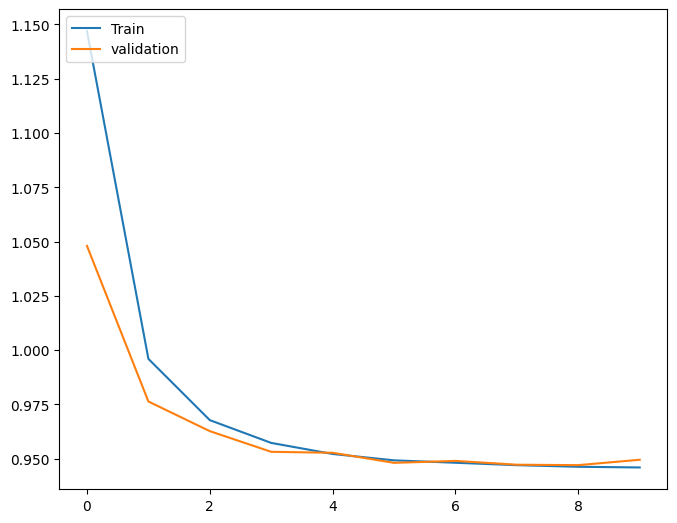

In [46]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title=('Epoch')
plt.xlabel=('Loss')
plt.legend(['Train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# Plotting sex accuracy

Checking for redefined functions:


TypeError: 'str' object is not callable

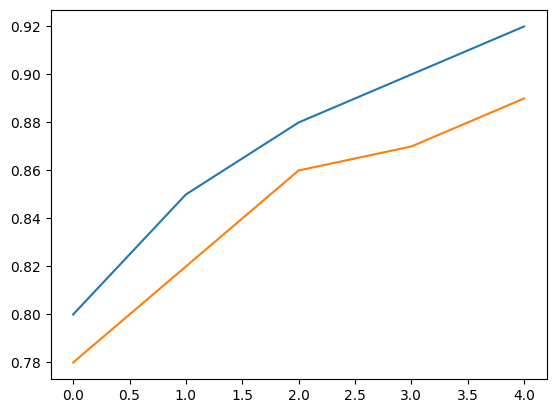

In [47]:
 import matplotlib.pyplot as plt

# Check for any redefined functions
print("Checking for redefined functions:")
for func in ['title', 'xlabel', 'ylabel', 'legend']:
    if func in globals() or func in locals():
        print(f"Conflict found: {func}")

# Sample data for History to demonstrate plotting
# Replace this with your actual History object
History = {
    'history': {
        'sex_out_accuracy': [0.8, 0.85, 0.88, 0.9, 0.92],
        'val_sex_out_accuracy': [0.78, 0.82, 0.86, 0.87, 0.89]
    }
}

# Start a new figure
plt.figure()

# Plot the training and validation accuracy
plt.plot(History['history']['sex_out_accuracy'])
plt.plot(History['history']['val_sex_out_accuracy'])

# Set the title and labels
plt.title('model_instance Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Set the legend
plt.legend(['Train', 'Validation'], loc='upper left')

# Adjust subplot parameters
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)

# Display the plot
plt.show()



# ploting Gender Accuracy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
# Replace these with your actual data
Y_test_2 = np.array([20, 25, 30, 35, 40])  # Actual ages
pred = np.array([22, 26, 29, 33, 41])  # Predicted ages

fig, ax = plt.subplots()
ax.scatter(Y_test_2, pred)
ax.plot([Y_test_2.min(), Y_test_2.max()], [Y_test_2.min(), Y_test_2.max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()


## Marking Report of the model (Gender Only)

In [ ]:
import numpy as np

In [ ]:
import numpy as np

pred_1 = []
i = 0
while i < len(pred):
    pred_1.append(int(np.round(pred[i])))
    i += 1

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(report)

In [ ]:


from sklearn.metrics import classification_report
import numpy as np

# Example arrays
Y_test_2 = np.array([[0, 1, 1, 0, 1]])
pred = np.array([[0.1, 0.8, 0.4, 0.7, 0.2]])

# Convert predictions to integer labels
pred_1 = [int(np.round(x)) for x in pred[0]]

# Ensure both Y_test_2[0] and pred_1 are arrays or lists of the same length
Y_test_2_0 = Y_test_2[0]  # True labels
print("True labels:", Y_test_2_0)
print("Predicted labels:", pred_1)

# Check lengths
if len(Y_test_2_0) != len(pred_1):
    raise ValueError("The lengths of true labels and predicted labels do not match.")

# Generate classification report
report = classification_report(Y_test_2_0, pred_1)
print(report)


## Making Heatmap of the Model(Gender Only)

In [ ]:
results=confusion_matrix(Y_test_2[0],pred_1)

In [ ]:


import seaborn as sns
sns.heatmap(results,annot=True)

## Testing The Images Ourself

In [ ]:
def test_image(ind, images_f, images_f_2, model_instance):
    plt.imshow(images_f[ind])  # Corrected the variable name
    image_test = images_f_2[ind]
    pred_1 = model_instance.predict(np.array([image_test]))  # Use the correct model instance
    sex_f = ['Male', 'Female']
    age = int(np.round(pred_1[1][0]))
    sex = int(np.round(pred_1[0][0]))
    print('Predicted Age is ' + str(age))
    print('Predicted Gender is ' + sex_f[sex])
    plt.show()

## Test 1

In [ ]:
test_image(4, images_f, images_f_2, model_instance)


# Test 2

In [ ]:
test_image(23,images_f,images_f_2,model_instance)

# Test 4

In [ ]:
test_image(168,images_f,images_f_2,model_instance)

In [ ]:
test_image(123,images_f,images_f_2,model_instance)

In [ ]:
test_image(1288,images_f,images_f_2,model_instance)